# 单因素方差分析

## 业务理解

探究施肥是否会对促进植株生成（植株生长以树高作为指标来衡量）,试验为：

- 对照组：清水 
- 实验组： 某肥料四个浓度梯度，分别是A,B,C,D，施肥一段时间之后测量树高

（要控制其他变量保持一致，比如施肥之前的树高要基本保持一致，生长势基本保持一致等等）

做方差分析的时候数据需要满足正态分布；方差齐性等。

正常拿到数据后需要对数据是否符合正态分布和组间方差是否一致做检验。在这里采用直接生成满足方差齐性和正态性条件的样本，故暂时忽略。

## 数据导入

In [73]:
# 模拟生成数据
import numpy as np
df = {'ctl':list(np.random.normal(10,5,100)),
      'treat1':list(np.random.normal(15,5,100)),\
      'treat2':list(np.random.normal(20,5,100)),\
      'treat3':list(np.random.normal(30,5,100)),\
      'treat4':list(np.random.normal(31,5,100))}

# 组合成数据框
import pandas as pd
df = pd.DataFrame(df)
df.head() # 宽格式数据

,ctl,treat1,treat2,treat3,treat4
0,6.258224,10.350319,17.233064,34.506443,27.133972
1,13.143507,14.530864,21.941544,32.300486,32.172745
2,8.147622,14.085781,12.508140,35.266608,31.550142
3,5.874957,21.877608,23.713638,34.707211,25.880530
4,14.713793,12.076544,11.834265,27.212396,33.294428


## 数据理解

In [74]:
# 查看数据形状
df.shape

(100, 5)

In [75]:
# 查看列名
df.columns

Index(['ctl', 'treat1', 'treat2', 'treat3', 'treat4'], dtype='object')

In [76]:
# 数据总体概述
df.describe()

,ctl,treat1,treat2,treat3,treat4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.797526,14.639276,20.307828,30.353519,31.522130
std,5.063291,5.568774,4.541890,5.514990,4.989091
min,-0.521718,0.698344,8.939525,15.781992,20.470651
25%,6.162407,10.757379,17.743476,27.290917,27.431911
50%,9.814990,14.720299,20.771182,30.554939,31.777117
75%,13.206764,19.251902,23.517276,34.216437,35.599887
max,21.871314,25.527838,31.031720,42.625079,43.967697


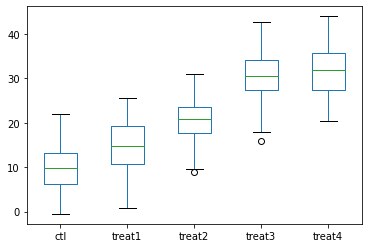

In [77]:
# 利用箱线图展示一下数据
df.boxplot(grid = False)
import matplotlib.pyplot as plt
plt.show()

## 数据准备（主要为数据格式转换）

In [78]:
# 转化数据格式
df_melt = df.melt() # 如果是双因素方差分析的宽格式数据转换，一般需要设置若干参数
df_melt.columns = ['Treat','Value']
df_melt.head()

,Treat,Value
0,ctl,6.258224
1,ctl,13.143507
2,ctl,8.147622
3,ctl,5.874957
4,ctl,14.713793


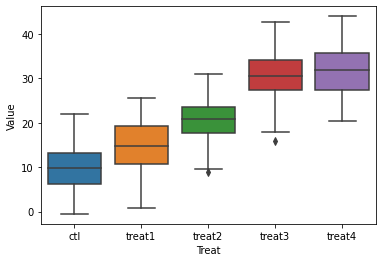

In [79]:
# 使用seaborn模块绘制箱线图
import seaborn as sns
import pandas.util.testing as tm

sns.boxplot(x='Treat',y='Value',data = df_melt)

## 提出假设

**提出的假设为：**
- H0：n1=n2=n3=n4=n5 (施肥对植株生长无显著影响)
- H1：ni (i =1,2, … , 5) 不全相等 (施肥对植株生长有显著影响)

## 参数设计与模型构建

In [80]:
# 导入相关模型库
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 模型拟合与构建，生成方差分析表
model = ols('Value~C(Treat)',data=df_melt).fit()
anova_table = anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Treat),36411.182699,4.0,343.2865,3.183259e-141
Residual,13125.724011,495.0,NaN,NaN


## 结果解读

In [81]:
anova_table

,sum_sq,df,F,PR(>F)
C(Treat),36411.182699,4.0,343.2865,3.183259e-141
Residual,13125.724011,495.0,NaN,NaN


P值为4.19*10<sup>-140</sup>远远小于0.05，故原假设（施肥对植株生长无显著影响）不成立，施肥对植株生长有显著影响，但是影响如何还需要通过效应量的大小来测量，在后面的双因素方差分析中会为大家具体讲解效应量大小的计算。

方差分析表只能得出施肥对植株生长有显著影响，但是怎样的影响机制并无法通过方差分析表获悉，所以我们可以通过多重比较来具体看看施肥是怎样影响植株生长的，哪种施肥方式对植株生长的影响更为显著？

In [82]:
# 多重检验，比较常用的检验方法是邓肯多重检验（Tukey HSD test）
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df_melt['Value'],df_melt['Treat'])
tukey_result = mc.tukeyhsd(alpha = 0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ctl treat1   4.8418  0.001  2.8479  6.8356   True
   ctl treat2  10.5103  0.001  8.5165 12.5041   True
   ctl treat3   20.556  0.001 18.5622 22.5498   True
   ctl treat4  21.7246  0.001 19.7308 23.7184   True
treat1 treat2   5.6686  0.001  3.6747  7.6624   True
treat1 treat3  15.7142  0.001 13.7204 17.7081   True
treat1 treat4  16.8829  0.001  14.889 18.8767   True
treat2 treat3  10.0457  0.001  8.0519 12.0395   True
treat2 treat4  11.2143  0.001  9.2205 13.2081   True
treat3 treat4   1.1686 0.4949 -0.8252  3.1624  False
----------------------------------------------------


## 建模前提假定条件的讨论

因为刚才进行单因素方差分析的数据是我通过numpy随机模拟生成的，故本身是满足方差齐性和正态性分布的，在这里暂不对方差分析的假定条件进行讨论，在后面的双因素方差分析为大家具体讲解。

# 双因素方差分析

## 业务理解

- 案例背景：检验不同喂食方法以及不同剂量对豚鼠牙齿生长的影响是否显著，数据来自R语言自带数据集；
- 方差分析测试模型中某处的均值是否存在差异（测试是否存在总体影响），但是并不能告诉我们差异在哪里（如果存在差异）；
- 为了找出同组变量之间的区别，我们必须进行事后测试。

## 数据导入

In [57]:
import pandas as pd

datafile="http://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv"
data = pd.read_csv(datafile)
data.head(10)

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


## 数据理解

In [58]:
# 数据形状
data.shape

(60, 4)

In [59]:
# 列名
data.columns

Index(['Unnamed: 0', 'len', 'supp', 'dose'], dtype='object')

In [60]:
data.describe(include='all')
# data.describe()

,Unnamed: 0,len,supp,dose
count,60.000000,60.000000,60,60.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,OJ,NaN
freq,NaN,NaN,30,NaN
mean,30.500000,18.813333,NaN,1.166667
std,17.464249,7.649315,NaN,0.628872
min,1.000000,4.200000,NaN,0.500000
25%,15.750000,13.075000,NaN,0.500000
50%,30.500000,19.250000,NaN,1.000000
75%,45.250000,25.275000,NaN,2.000000


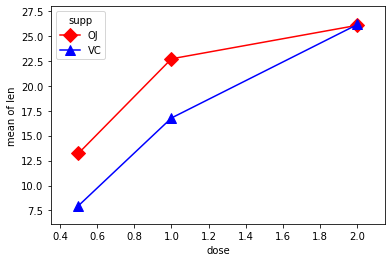

In [61]:
# 利用可视化大致探索喂食方法和剂量对豚鼠牙齿生长的影响
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(data.dose, data.supp, data.len, 
                       colors=['red','blue'], markers=['D','^'], ms=10)

## 数据准备（数据格式转换）

**如果出现如下图1所示，我们就需要自编函数将数据格式转换成后面函数可以处理的数据格式，也就是我上面那种数据格式**

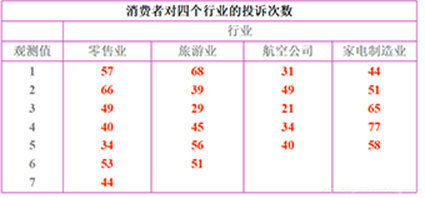

**如果出现如下图2所示，我们一般可以使用pandas自带的melt方法实现宽转长。**

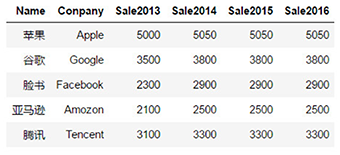

## 提出假设
**对喂食方法因素提出的假设为：**
- H0：a1=a2=a3=a4 (喂食方法对豚鼠牙齿生长无显著影响)
- H1：ai (i =1,2, … , 4) 不全相等 (有显著影响)

**对剂量因素提出的假设为：**
- H3：b1=b2=b3=b4=b5 (剂量对豚鼠牙齿生长无显著影响)
- H4：bj (j =1,2,…,5) 不全相等 (有显著影响)

**对喂食方法和剂量是否具有交互效应提出的假设为：**
- H5：喂食方法和剂量的交互效应对观测变量的总体均值无显著影响
- H6：喂食方法和剂量的交互效应对观测变量的总体均值存在显著影响

**PS：一般原假设都是我们想推翻的假设，备择假设都是我们想要验证的假设**

## 参数设置与模型构建

In [62]:
# 导入相关的模型库
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 考虑无交互作用
formula_1 = 'len ~ C(supp) + C(dose)' # 构建模型参数
model_1 = ols(formula_1, data).fit() # 模型构建
aov_table_1 = anova_lm(model_1, typ=2) # 形成方差分析表
aov_table_1 # 显示方差分析表

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,14.016638,4.292793e-04
C(dose),2426.434333,2.0,82.810935,1.871163e-17
Residual,820.425000,56.0,NaN,NaN


In [63]:
# 考虑交互作用
formula_2 = 'len ~ C(supp) + C(dose) + C(supp):C(dose)' # 构建模型参数
model_2 = ols(formula_2, data).fit() # 模型构建
aov_table_2 = anova_lm(model_2, typ=2) # 形成方差分析表
aov_table_2 # 显示方差分析表

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,15.571979,2.311828e-04
C(dose),2426.434333,2.0,91.999965,4.046291e-18
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN


In [64]:
"""
由于Statsmodels无法计算效应的大小，也就是影响的程度，主要是计算各个均方占总均方的比值，
于是自己自定义函数计算效应量大小，eta_squared()函数主要计算效应量大小
omega_squared()函数也是计算效应量的大小，但是与eta_squared()相比，还考虑了误差，提供了相对更准确的效应量估计。
"""
def eta_squared(aov): 
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov): 
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

## 结果解读

### 无交互效应结果解读

In [65]:
eta_squared(aov_table_1)
omega_squared(aov_table_1)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
C(supp),205.350000,1.0,14.016638,4.292793e-04,0.059484,0.055006
C(dose),2426.434333,2.0,82.810935,1.871163e-17,0.702864,0.691442
Residual,820.425000,56.0,NaN,NaN,NaN,NaN


- 喂食方法supp因素所对应的P值为4.29*10<sup>-4</sup>< 0.05，所以H0假设不成立，H1假设成立，喂食方法对豚鼠牙齿生长有显著影响；
- 剂量dose因素所对应的P值为1.87*10<sup>-17</sup>< <0.05，所以H3假设不成立，H4假设成立，剂量对豚鼠牙齿生长有显著影响；
- 因为方差分析只能说明不同喂食方法和不同的剂量对豚鼠牙齿生长有影响，但不能表示不同喂食方法之间对豚鼠牙齿生长影响的差异程度以及不同的剂量之间对豚鼠牙齿生长影响的差异程度，如果发现存在差异，则需要检查组内差异的位置，这里使用Tukey HSD测试对喂食方法和剂量进行组内多重比较。

### 考虑交互效应结果解读

In [66]:
eta_squared(aov_table_2)
omega_squared(aov_table_2)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
C(supp),205.350000,1.0,15.571979,2.311828e-04,0.059484,0.055452
C(dose),2426.434333,2.0,91.999965,4.046291e-18,0.702864,0.692579
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02,0.031377,0.023647
Residual,712.106000,54.0,NaN,NaN,NaN,NaN


- 喂食方法supp因素所对应的P值为2.31*10<sup>-4</sup>< 0.05，所以H0假设不成立，H1假设成立，喂食方法对豚鼠牙齿生长有显著影响；
- 剂量dose因素所对应的P值为4.04*10<sup>-18</sup>< <0.05，所以H3假设不成立，H4假设成立，剂量对豚鼠牙齿生长有显著影响；
- 可以看出，考虑交互效应后，与喂食方法和剂量所对应的F值和P值都发生了微小的改变，且交互项的P值为0.02<0.05，对豚鼠牙齿生长的影响显著
- 因为方差分析只能说明不同喂食方法和不同的剂量对豚鼠牙齿生长有影响，但不能表示不同喂食方法之间对豚鼠牙齿生长影响的差异程度以及不同的剂量之间对豚鼠牙齿生长影响的差异程度，如果发现存在差异，则需要检查组内差异的位置，这里使用Tukey HSD测试对喂食方法和剂量进行组内多重比较。

### 多重比较

In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(data['len'], data['dose']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.5    1.0     9.13 0.001  5.9018 12.3582   True
   0.5    2.0   15.495 0.001 12.2668 18.7232   True
   1.0    2.0    6.365 0.001  3.1368  9.5932   True
---------------------------------------------------


- Tuckey HSD测试清楚地表明，在剂量dose因素的维度上第一组至第三组之间都存在显着差异，reject 都为 True，说明不同的剂量之间都会有显着性差异

- 不对喂食方法supp因素进行多重比较，是因为该因素的水平为2，我们在假设检验成立的时候，就已经能够判断之间具有显著差异了，无须通过多重比较

## 建模前提假定条件的讨论

### 方差分析需满足的条件

- 1.从因子水平定义的总体中独立且随机地获得观察结果

- 2.每个因子水平的数据均呈正态分布

- 3.案例独立性：样本案例应相互独立

- 4.方差的同质性：同质性是指各组之间的方差应近似相等


### 需检验的条件与检验方法

- 一般条件1和条件3都是默认确保成立的，不需要检验

- 我们需要检验的就是方差是否近似相等（方差齐性检验），主要采用Shapiro-Wilk试验和Q-Q图试验

- 样本是否呈正态分布（正态分布检验），主要采用Levene检验

### 正态性检验

提出假设：

- H0：样本满足正态性分布
- H1：样本不满足正态性分布

In [69]:
# 方法一 Shapiro-Wilk试验
w, pvalue = stats.shapiro(model.resid)
print(f'w-value={w} \np-value={pvalue}')

w-value=0.9955519437789917 
p-value=0.1663428544998169


上述p值小于0.05，所以正态性检验通过，满足样本分布正态性的条件。

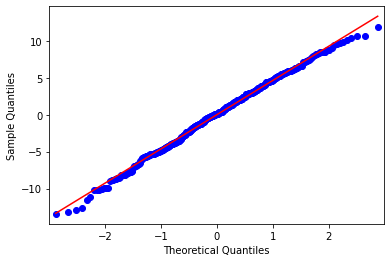

In [70]:
# 方法二 :Q-Q图试验
import statsmodels.api as sm
import matplotlib.pyplot as plt

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show() # (用OLS方法拟合的线性模型)很容易得到一个分位数-分位数(QQplot)，判断模型的拟合程度

从上图中，我们看到所有数据点都靠近45度线，因此我们可以得出结论，它遵循正态分布。

### 方差齐性检验


提出假设：

- H0：样本满足方差齐性
- H1：样本不满足方差齐性

In [71]:
# 检验supp因素的方差齐性
group1=data[data['dose']==0.5]['len']
group2=data[data['dose']==1.0]['len']
group3=data[data['dose']==2.0]['len']
leveneTestRes1 = stats.levene(group1,group2,group3, center='median')
print('w-value=%6.4f\np-value=%6.4f' %leveneTestRes1)

w-value=0.6457
p-value=0.5281


In [72]:
# 检验dose因素的方差齐性
group4=data[data['supp']=="OJ"]['len']
group5=data[data['supp']=="VC"]['len']
leveneTestRes1 = stats.levene(group4,group5, center='median')
print('w-value=%6.4f\np-value=%6.4f' %leveneTestRes1)

w-value=1.2136
p-value=0.2752


上述p值均小于0.05，所以正态性检验通过，满足样本分布正态性的条件。